In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import cv2 as cv
import os
import imghdr


## data cleaning 

In [8]:
extensions=['jpeg','jpg','png',]

In [9]:
data_dir='data'

In [10]:
for image_classes in os.listdir(data_dir):
    print(f"\t\t\t\t\t\t{image_classes}")
    if image_classes in ['angry','happy','sad','haarcascades']:
        continue
    for image in os.listdir(os.path.join(data_dir,image_classes)):
        img_path=os.path.join(data_dir,image_classes,image)
        try:
            extn=imghdr.what(img_path)
#             print(extn)
            if extn not in extensions:
                print(f"{images} removed")
                os.remove(img_path)
        except:
            print(f"{images} removed")
            os.remove(img_path)

						john
						maria
						rohit
						rojer
						ronaldo
						virat


## Detecting the faces with two eyes

In [14]:
face_cascade = cv.CascadeClassifier('haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascades\haarcascade_eye.xml')

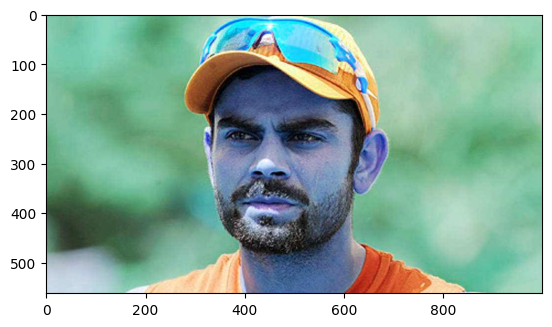

In [15]:
img=cv.imread('virat.jpg')
plt.imshow(img)

In [16]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray, 1.3, 5)

In [17]:
x,y,h,w=faces[0]

In [18]:
face_img=cv.rectangle(img,(x,y),(x+h,y+h),(255,0,0),2)

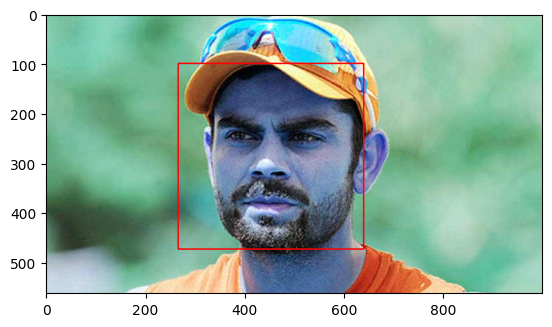

In [19]:
plt.imshow(face_img)

In [20]:
roi_img=img[y:y+h,x:x+w]
roi_gray=gray[y:y+h,x:x+h]

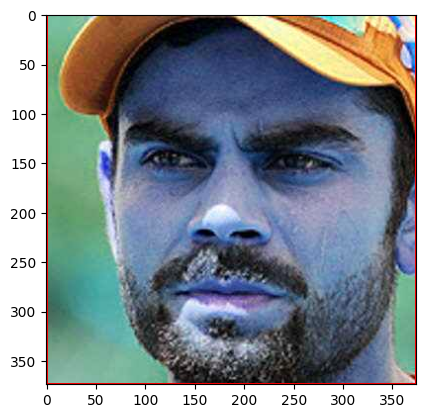

In [21]:
plt.imshow(roi_img)

In [22]:
eyes=eye_cascade.detectMultiScale(roi_gray)

In [23]:
eyes

array([[ 90, 110,  72,  72],
       [229, 136,  23,  23],
       [272, 144,  21,  21],
       [211, 115,  73,  73]])

In [24]:
for ex,ey,eh,ew in eyes:
    cv.rectangle(roi_img,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
    
    

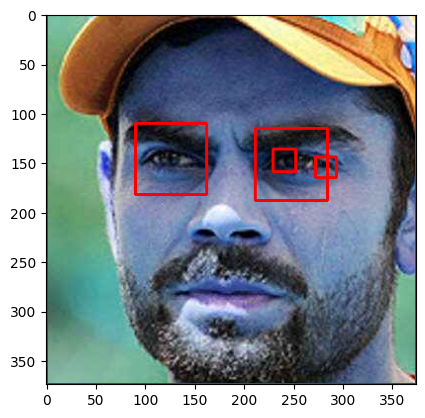

In [25]:
plt.imshow(roi_img)

In [42]:
def get_cropped(img_path):
    img=cv.imread(img_path)
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
#     now read the face
    face=face_cascade.detectMultiScale(gray)
    for x,y,w,h in face:
        roi_img=img[y:y+h,x:x+h]
        roi_gray=gray[y:y+h,x:x+h]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_img

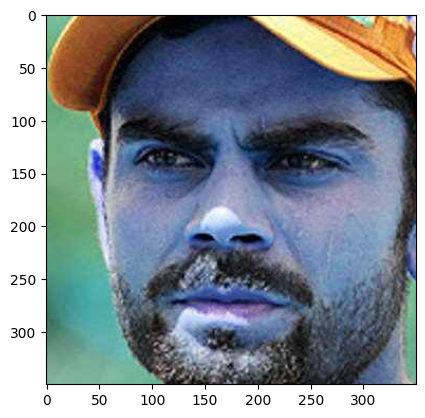

In [43]:
# now we will test
plt.imshow(get_cropped('virat.jpg'))

## now we will crop the images of only faces and save it respectively


In [46]:
for image_classes in os.listdir(data_dir):
    print(f"\t\t\t\t\t\t{image_classes}")
    count=1
    for image in os.listdir(os.path.join(data_dir,image_classes)):
        img_path=os.path.join(data_dir,image_classes,image)
        exnt=imghdr.what(img_path)
        roi_img=get_cropped(img_path)
        if roi_img is not None:
            filename=image_classes+str(count)+"."+exnt
            print(filename)
            cv.imwrite(f'cropped\\{image_classes}\\'+filename,roi_img)
            count+=1
        

						john
john1.jpeg
john2.jpeg
john3.jpeg
john4.jpeg
john5.png
john6.jpeg
john7.jpeg
john8.jpeg
john9.png
john10.jpeg
john11.jpeg
john12.jpeg
john13.jpeg
john14.jpeg
john15.jpeg
john16.jpeg
john17.png
john18.jpeg
john19.jpeg
john20.jpeg
john21.jpeg
john22.jpeg
john23.jpeg
john24.jpeg
john25.jpeg
john26.jpeg
john27.jpeg
john28.jpeg
john29.jpeg
john30.jpeg
john31.jpeg
john32.jpeg
john33.jpeg
john34.jpeg
john35.jpeg
john36.jpeg
john37.jpeg
john38.jpeg
john39.jpeg
john40.jpeg
john41.jpeg
john42.jpeg
john43.jpeg
john44.jpeg
john45.jpeg
john46.jpeg
john47.jpeg
john48.jpeg
john49.png
john50.png
john51.png
john52.jpeg
john53.jpeg
john54.jpeg
john55.png
john56.png
john57.png
john58.jpeg
john59.jpeg
john60.jpeg
john61.jpeg
john62.jpeg
john63.jpeg
						maria
maria1.jpeg
maria2.jpeg
maria3.jpeg
maria4.jpeg
maria5.jpeg
maria6.jpeg
maria7.jpeg
maria8.jpeg
maria9.jpeg
maria10.jpeg
maria11.jpeg
maria12.jpeg
maria13.jpeg
maria14.jpeg
maria15.jpeg
maria16.jpeg
maria17.jpeg
maria18.jpeg
maria19.jpeg
m

### now Model part begins

In [1]:
classes=['john','virat','maria','rojer','rohit','ronaldo']

In [233]:
x=[]
y=[]


In [234]:
cropped_dir='cropped'

In [235]:
for class_names in os.listdir(cropped_dir):
    print(f"                                                        {class_names}")
    for image in os.listdir(os.path.join(cropped_dir,class_names)):
        img_path=os.path.join(cropped_dir,class_names,image)
#         print(img_path)
        img=cv.imread(img_path)
        res_img=cv.resize(img,(128,128))
        x.append(res_img)
        y.append(classes.index(class_names))
        

                                                        maria
                                                        rohit
                                                        rojer
                                                        ronaldo
                                                        virat


In [236]:
len(y)

401

In [68]:
import random

Text(0.5, 0, '1')

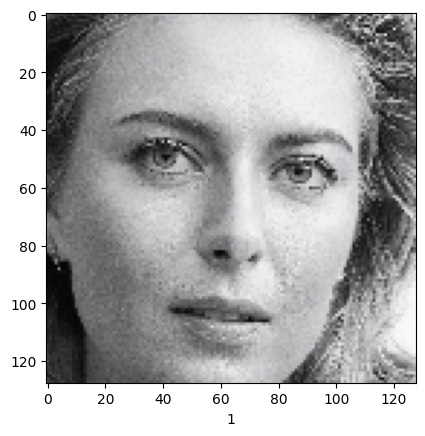

In [237]:
index=random.randint(0,len(y))
plt.imshow(x[index])
plt.xlabel(y[index])

In [238]:
x=np.array(x)
y=np.array(y)

In [239]:
x=x/255

In [240]:
x[0].shape

(128, 128, 3)

In [88]:
from sklearn.model_selection import train_test_split

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

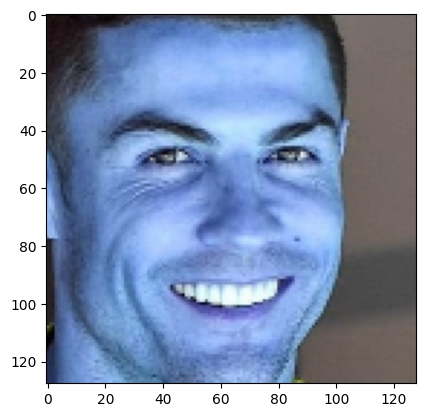

In [242]:
plt.imshow(x_train[0])

In [243]:
augmentation=keras.Sequential()
# data augmentation
augmentation.add(keras.layers.experimental.preprocessing.RandomFlip())
augmentation.add(keras.layers.experimental.preprocessing.RandomRotation(0.4))


In [251]:
model=keras.Sequential()

# cnn layer
model.add(keras.layers.Conv2D(60,kernel_size=(3,3),activation='relu',input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPool2D())


model.add(keras.layers.Conv2D(45,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(30,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())

# deep nn
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(5,activation='softmax'))

In [252]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [272]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
12/12 [==============================] - 10s 823ms/step - loss: 0.1473 - accuracy: 0.9500
Epoch 2/2
12/12 [==============================] - 10s 859ms/step - loss: 0.0631 - accuracy: 0.9917


In [273]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 76ms/step - loss: 1.2232 - accuracy: 0.8049


[1.2231963872909546, 0.8048780560493469]

In [271]:
model.save('sportspersonmodel2.h5')

# now we have a very good accuracy of 87%

In [2]:
import numpy as np
class_array=np.array(classes)

In [105]:
def get_predictions(y):
    l=[]
    for i in y:
        val=np.argmax(i)
        l.append(class_array[val])
    return l

In [121]:
y_p=model.predict(np.expand_dims(x_test[29],0))

1/1 [==============================] - 0s 30ms/step


In [122]:
get_predictions(y_p)

['ronaldo']

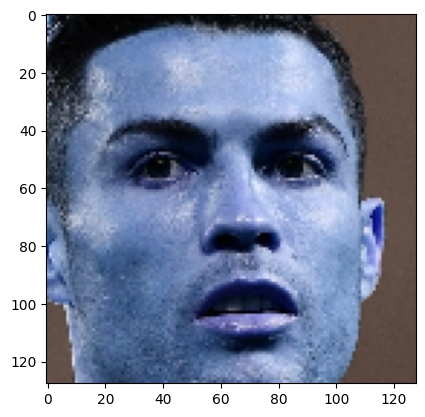

In [124]:
plt.imshow(x_test[29])

In [131]:
keras.utils.plot_model(model,to_file="model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Now we will do Post classification 

In [132]:
from sklearn.metrics import classification_report

In [133]:
y_p=model.predict(x_test)

2/2 [==============================] - 0s 109ms/step


In [136]:
def get_indexes(y):
    l=[]
    for i in y:
        val=np.argmax(i)
        l.append(val)
    return l

cm=tf.math.confusion_matrix(y_test,get_indexes(y_p))

In [137]:
from seaborn import heatmap

<Axes: >

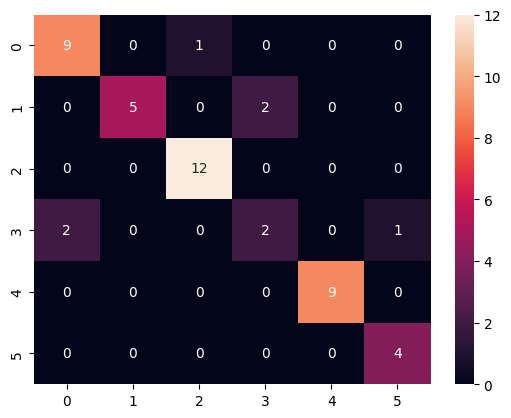

In [138]:
heatmap(cm,annot=True)

classes=['john','virat','maria','rojer','rohit','ronaldo']

In [140]:
print(classification_report(y_test,get_indexes(y_p)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       1.00      0.71      0.83         7
           2       0.92      1.00      0.96        12
           3       0.50      0.40      0.44         5
           4       1.00      1.00      1.00         9
           5       0.80      1.00      0.89         4

    accuracy                           0.87        47
   macro avg       0.84      0.84      0.83        47
weighted avg       0.87      0.87      0.87        47



In [3]:
# saving the required things
import pickle
f=open('class_array.pickle','wb')
pickle.dump(class_array,f)
f.close()

In [264]:
obj=pickle.load(open('class_array.pickle','rb'))

In [265]:
obj

array(['virat', 'maria', 'rojer', 'rohit', 'ronaldo'], dtype='<U7')

In [355]:

img=get_cropped('roger-federer-sportstiger-1687452697768-original.jpg')
print(f"njj{img}")
img=cv.resize(img,(128,128))

njj[[[ 71  89 154]
  [ 71  89 154]
  [ 71  88 151]
  ...
  [ 90 113 163]
  [ 99 123 175]
  [ 99 123 177]]

 [[ 68  88 153]
  [ 71  89 154]
  [ 72  88 154]
  ...
  [ 82 105 153]
  [ 90 115 165]
  [ 97 121 173]]

 [[ 68  88 153]
  [ 68  88 153]
  [ 76  94 159]
  ...
  [ 69  93 139]
  [ 82 105 153]
  [ 92 117 167]]

 ...

 [[ 37  40  44]
  [ 38  41  45]
  [ 52  52  58]
  ...
  [119 135 164]
  [120 136 165]
  [124 138 167]]

 [[ 39  41  42]
  [ 41  43  44]
  [ 53  54  58]
  ...
  [122 136 164]
  [121 135 163]
  [121 138 165]]

 [[ 39  41  42]
  [ 41  43  44]
  [ 52  53  57]
  ...
  [119 134 160]
  [120 135 161]
  [121 138 165]]]


In [356]:
img=img/255

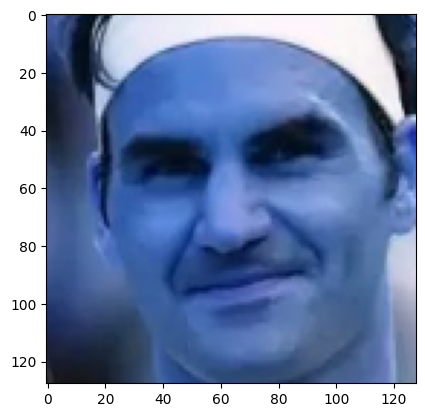

In [357]:
plt.imshow(img)

In [358]:
p=model.predict(np.expand_dims(img,0))
np.argmax(p)

1/1 [==============================] - 0s 42ms/step


2

In [359]:
get_predictions(p)

['rojer']

In [351]:
p

array([[0.00105869, 0.91944027, 0.02614869, 0.00200435, 0.05134798]],
      dtype=float32)

In [352]:
# model1=keras.models.load_model('sportspersonmodel.h5')

In [360]:
np.argmax(model1.predict(np.expand_dims(img,0)))

1/1 [==============================] - 0s 48ms/step


3

In [228]:
x_test[0]

array([[[0.49019608, 0.59607843, 0.84705882],
        [0.49019608, 0.59607843, 0.84705882],
        [0.49411765, 0.59607843, 0.84705882],
        ...,
        [0.75294118, 0.80392157, 0.94901961],
        [0.74901961, 0.79607843, 0.94509804],
        [0.74509804, 0.79607843, 0.94509804]],

       [[0.48235294, 0.58431373, 0.83137255],
        [0.47843137, 0.58039216, 0.82745098],
        [0.47843137, 0.58431373, 0.82352941],
        ...,
        [0.74901961, 0.8       , 0.94901961],
        [0.74509804, 0.79607843, 0.94509804],
        [0.74117647, 0.79607843, 0.94509804]],

       [[0.47843137, 0.57647059, 0.81176471],
        [0.47058824, 0.57254902, 0.80392157],
        [0.46666667, 0.56862745, 0.8       ],
        ...,
        [0.72941176, 0.78431373, 0.93333333],
        [0.7254902 , 0.78431373, 0.93333333],
        [0.72156863, 0.78431373, 0.93333333]],

       ...,

       [[0.31764706, 0.4       , 0.16470588],
        [0.35294118, 0.43137255, 0.19215686],
        [0.38039216, 0


# so our first model works fine with classsification